In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('gabung.csv')
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,class
0,0.353,0.744,0.590,0.354,0.00,0.501,0.234,0.483,1
1,0.059,0.427,0.541,0.293,0.00,0.396,0.117,0.167,0
2,0.471,0.920,0.525,0.000,0.00,0.347,0.254,0.183,1
3,0.059,0.447,0.541,0.232,0.11,0.419,0.038,0.000,0
4,0.000,0.688,0.328,0.354,0.20,0.642,0.944,0.200,1
5,0.294,0.583,0.607,0.000,0.00,0.382,0.053,0.150,0
6,0.176,0.392,0.410,0.323,0.10,0.462,0.073,0.083,1
7,0.588,0.578,0.000,0.000,0.00,0.526,0.024,0.133,0
8,0.118,0.990,0.574,0.455,0.64,0.455,0.034,0.533,1
9,0.471,0.628,0.787,0.000,0.00,0.000,0.066,0.550,1


In [3]:
dataset.isnull().sum()
print(dataset.isnull().sum())

X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
class    0
dtype: int64


In [4]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

X1
X2
X3
X4
X5
X6
X7
X8
class


In [5]:
X = dataset.iloc[:, 0:8].values
x = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8].values
y_name = dataset.iloc[:, 8:9]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (768, 8)
y shape: (768, 1)


In [6]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

X1
X2
X3
X4
X5
X6
X7
X8


Class:
class


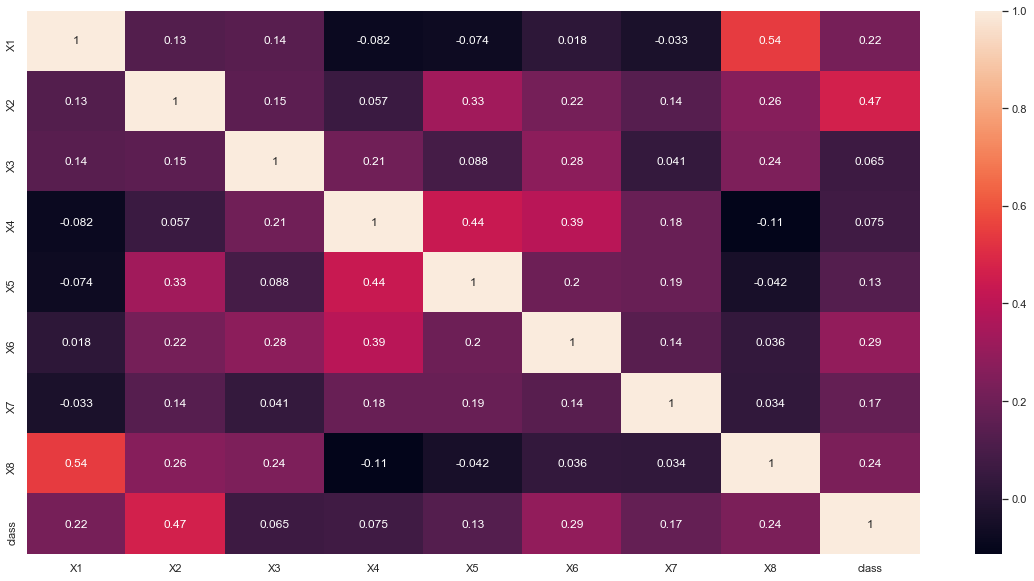

In [7]:
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)



In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')

In [32]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [33]:
y_pred_knn = classifier_knn.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[127  20]
 [ 36  48]]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='weighted')
re  = recall_score(y_test, y_pred_knn, average='weighted')
f1  = f1_score(y_test, y_pred_knn, average='weighted')
mc  = matthews_corrcoef(y_test, y_pred_knn)  

In [36]:
np.set_printoptions()
print("Akurasi =", ac)
print("Presisi =",pre)
print("Recall =", re)
print("F1 =", f1)
print("MCC =", mc)

Akurasi = 0.7575757575757576
Presisi = 0.7525015583478234
Recall = 0.7575757575757576
F1 = 0.7510726964037661
MCC = 0.45952875346278466


In [37]:
print(ac)
print(pre)
print(re)
print(f1)
print(mc)

0.7575757575757576
0.7525015583478234
0.7575757575757576
0.7510726964037661
0.45952875346278466


In [ ]:
matrix = plot_confusion_matrix(classifier_knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().axes[0].tick_params
plt.gcf().axes[1].tick_params
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')